In [1]:
import json 
import os
from tqdm.auto import tqdm
from utils import web_cam, node_json, split_json, visualize, web_cam_photo, split_func
import gdown
# gdown.download('https://drive.google.com/uc?id=16_Ntdx-Wvn5Lf2F1MmcdGrPasNHwjkin', 
#                r'model\epoch 3-4200 weight.pt')
# gdown.download('https://drive.google.com/uc?id=1Znb_UM4PmlL-qXY5iBaU9hQcxeQC4OkI',
#                'model\checkpoint.tar')

d:\py\envs\SLPT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
ratio = 64 #每帧複製次數
interval = 1 #隔幾幀
datasetfolder = 'dataset'
length = 10
import numpy as np

datasetfolder = 'dataset'
word = '下雨天不能出門'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)

#web_cam(save_folder=save_folder, recording_time=length, break_time=2)
node_json(input_video, save_folder)
split_json(input_json,
           save_folder,
           time_mark_path,
           uniform_length=length*32)
json_path = os.path.join(save_folder,'segmented.json')
visualize(json_path, 50)

with open(json_path, 'r') as f:
    splited_json = json.load(f)
print(len(splited_json))
indices = [i for i in range(20)] + [(i+21) for i in range(20)]
data = np.array(splited_json)
x = data[:, indices, :]
container = np.zeros_like(x)
container[:,20:] = x[:,20:]
selected_data = container


output_path = os.path.join(save_folder, class_name)
os.makedirs(output_path, exist_ok=True)
for i, index in enumerate(range(0, len(splited_json), interval)):
    output_container = []

    for _ in range(ratio):
        output_container.append(selected_data[index].tolist())

    with open(os.path.join(output_path, f'{word}_output_data_{i}.json'), 'w') as file:
        json.dump(output_container, file,indent=4)

358 359
(301, 42, 2)
(320, 42, 2) (50, 42, 2)
320


In [17]:
import torchvision
import torch
import os
from model.model import MAE
from utils import ViT, load_json

model_ver = 27
model_path = rf'C:\Users\acnight\Documents\GitHub\SLPT\Project-SLPT\Sign_split\epoch-{model_ver}weight.pt'
num_class = 23

datasetfolder = 'dataset'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)
output_path = os.path.join(save_folder, class_name)

In [18]:
CHECKPOINT_PATH = 'checkpoint.tar'

checkpoint = torch.load(CHECKPOINT_PATH)
step = checkpoint['step']
mean = checkpoint['mean']
std = checkpoint['std']


vit = torchvision.models.vit_b_16(weights=None)
pretrained_model = MAE(vit, 64, 80)
model = ViT(pretrained_model, num_class = num_class)
model.load_state_dict(torch.load(model_path))
model = model.to('cuda')
model = model.eval()

In [19]:
prediction_list = [[] for _ in range(num_class)]
lable = []

for i in range(len(os.listdir(output_path))):
    path = os.path.join(output_path, f'{word}_output_data_{i}.json')
    x = load_json(path, 
                  mean=mean,
                  std=std,
                  augment=False).to('cuda')
    prediction = model(x)
    _, predicted_class = torch.max(prediction, 1)
    lable.append(predicted_class.detach())
    for i, item in enumerate(prediction.detach()[0].tolist()):
        prediction_list[i].append(item)

In [20]:
results = []
for i, item in enumerate(lable):
    #print(i, item.tolist()[0])
    results.append((i, item.tolist()[0]))
result_path = os.path.join(save_folder,'result.json')
print(results)
with open(result_path,'w') as f:
    json.dump(results,f,indent=4)

[(0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (11, 8), (12, 8), (13, 8), (14, 8), (15, 8), (16, 8), (17, 8), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 3), (24, 3), (25, 19), (26, 19), (27, 19), (28, 19), (29, 19), (30, 19), (31, 19), (32, 19), (33, 19), (34, 20), (35, 20), (36, 20), (37, 20), (38, 8), (39, 8), (40, 7), (41, 12), (42, 12), (43, 12), (44, 7), (45, 7), (46, 7), (47, 7), (48, 7), (49, 7), (50, 7), (51, 7), (52, 7), (53, 7), (54, 7), (55, 7), (56, 7), (57, 7), (58, 7), (59, 7), (60, 7), (61, 7), (62, 7), (63, 10), (64, 10), (65, 10), (66, 10), (67, 10), (68, 10), (69, 10), (70, 10), (71, 18), (72, 18), (73, 18), (74, 18), (75, 18), (76, 18), (77, 18), (78, 18), (79, 18), (80, 18), (81, 18), (82, 18), (83, 18), (84, 18), (85, 18), (86, 18), (87, 18), (88, 18), (89, 18), (90, 18), (91, 18), (92, 18), (93, 18), (94, 18), (95, 18), (96, 18), (97, 18), (98, 18), (99, 18), (100, 18), (101, 18), (102, 4), (103, 4), (104, 17), (10

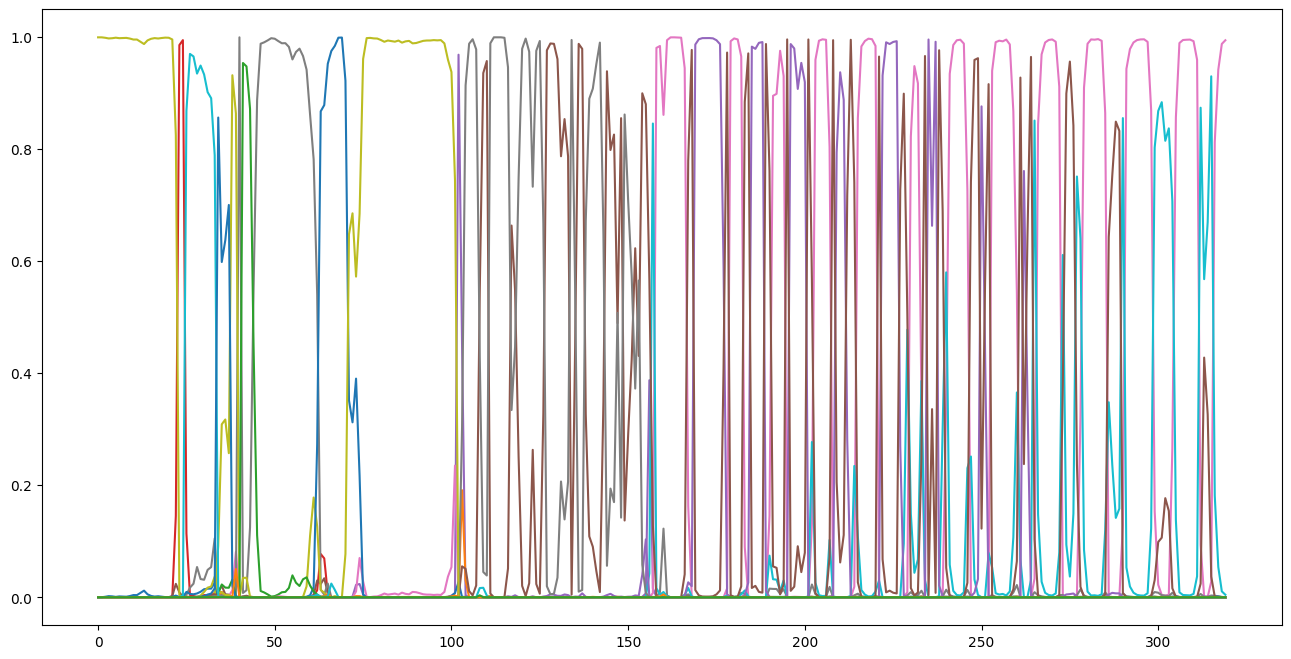

In [21]:
import matplotlib.pyplot as plt

# 创建一些示例数据
x = [i for i in range(len(prediction_list[0]))]

# 设置画布大小（单位：英寸）
plt.figure(figsize=(16, 8))

# 绘制折线图，并正确拼写 label 参数
for y in prediction_list:
    plt.plot(x, y, label='')
# 显示图表
plt.show()

不要開這個(除非想看)

In [71]:
from utils import visualize_slider
json_path = os.path.join(save_folder,'segmented.json')
visualize_slider(json_path, 320)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Hand Key Points' in function 'cvGetTrackbarPos'


segmented and visualization

In [81]:
datasetfolder = 'dataset'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'segmented.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'results')
os.makedirs(save_folder, exist_ok=True)
# results = []
# result_path = os.path.join(save_folder,'result.json')
# with open(result_path,'r') as f:
#     results =json.load(f)
# print(results)

In [82]:
print(len(results))
re=[]
fp=18 #一個詞大概幾陣
ra=int(fp*0.7) #標準
x = 0
standard = 0

for i in range(0, len(results)-fp):
    tmp=[]
    for j in range(0, fp):
        tmp.append(results[j+i][1])
    
    tmp=sorted(tmp)
    num=tmp.count(tmp[ra])
    if num>=ra:
        re.append(tmp[ra])
    else:
        re.append(-1)
print(re)

b=0
ans=[]
for i in range(1, len(re)):

    if re[i] != re[i-1] :
        if i+fp-x-b >= standard and re[i-1]!=-1:
            x = 0
            y = 0
            for o in reversed(range(b,i+fp-x)):
                if results[o][1]!=re[i-1]:
                    x+=1
                    #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
                else:
                    break
            for o in range(b,i+fp-x):
                if results[o][1]!=re[i-1]:
                    y+=1
                    #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
                else:
                    break
            #print(x)
            ans.append([b+y,i+fp-x-1,i+fp-x-b,re[i-1]])
            x=0
            y=0
        b=i
if i+fp-x-b >= standard and re[len(re)-1]!=-1:
    x = 0
    y = 0
    for o in reversed(range(b,len(re)+fp-x)):
        if results[o][1]!=re[len(re)-1]:
            x+=1
            #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
        else:
            break
    for o in range(b,len(re)+fp-x):
        if results[o][1]!=re[len(re)-1]:
            y+=1
            #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
        else:
            break
    #print(x)
    ans.append([b+y,len(re)+fp-x-1,len(re)+fp-x-b,re[len(re)-1]])
    x=0
    y=0
    
print(ans)

320
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 6, 6,

找ABA

In [83]:
print(len(results))
re=[]
fp=6 #一個詞大概幾陣
ra=int(fp*0.7) #標準
x = 0
standard = 10

for i in range(0, len(results)-fp):
    tmp=[]
    for j in range(0, fp):
        tmp.append(results[j+i][1])
    
    tmp=sorted(tmp)
    num=tmp.count(tmp[ra])
    if num>=ra:
        re.append(tmp[ra])
    else:
        re.append(-1)
print(re)

b=0
out=[]
for i in range(1, len(re)):

    if re[i] != re[i-1] :
        if i+fp-x-b >= standard and re[i-1]!=-1:
            x = 0
            y = 0
            for o in reversed(range(b,i+fp-x)):
                if results[o][1]!=re[i-1]:
                    x+=1
                    #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
                else:
                    break
            for o in range(b,i+fp-x):
                if results[o][1]!=re[i-1]:
                    y+=1
                    #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
                else:
                    break
            #print(x)
            if i+fp-x-b <= standard:
                out.append([b+y,i+fp-x-1,i+fp-x-b,re[i-1]])
            x=0
            y=0
        b=i
if i+fp-x-b >= standard and re[len(re)-1]!=-1:
    x = 0
    y = 0
    for o in reversed(range(b,len(re)+fp-x)):
        if results[o][1]!=re[len(re)-1]:
            x+=1
            #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
        else:
            break
    for o in range(b,len(re)+fp-x):
        if results[o][1]!=re[len(re)-1]:
            y+=1
            #print([b,i+fp-x-1,i+fp-x-b,re[i-1]])
        else:
            break
    #print(x)
    if i+fp-x-b <= standard:
        out.append([b+y,len(re)+fp-x-1,len(re)+fp-x-b,re[len(re)-1]])
    x=0
    y=0
    
print(out)

320
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, -1, -1, -1, 19, 19, 19, 19, 19, 19, 19, -1, -1, 20, 20, 20, -1, -1, -1, -1, -1, -1, -1, -1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, -1, -1, 10, 10, 10, 10, 10, 10, -1, -1, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, -1, -1, -1, 17, 17, 17, -1, -1, -1, -1, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, -1, -1, 15, 15, 15, 15, -1, -1, -1, -1, 17, 17, 17, 17, 17, 17, 17, -1, -1, -1, -1, -1, 17, 17, 17, 17, -1, -1, 15, -1, -1, -1, -1, 6, 6, 6, 6, 6, 6, -1, -1, -1, -1, -1, 14, 14, 14, 14, 14, 14, 14, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 14, 14, 14, -1, -1, -1, -1, -1, 6, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 6, 6, -1, -1, -1, 14, 14, 14, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 6, 6, -1, -1, -1, 15, 15, 15, -1, -1, -1, 6, 6, 6, 6, 6, -1, -1, -1, -1, -1, -1

In [84]:
for i in range(0,len(out)-2):
    for o in range(i-2,i):
        if out[o][3] == out[i][3] and out[o][0]<out[i][0]:
            out[i][0] = out[o][0]
            out[i][2] = out[i][1] - out[i][0]
    for o in range(i+1,i+3):
        if out[o][3] == out[i][3] and out[o][1]>out[i][1]:
            out[i][1] = out[o][1]
            out[i][2] = out[i][1] - out[i][0]
for i,item in enumerate(out):
    if item[2] >= 21:
        ans.append(item)
print(out)
print(ans)

[[63, 70, 10, 10], [127, 133, 8, 15], [134, 153, 19, 17], [134, 153, 19, 17], [158, 260, 102, 6], [169, 177, 10, 14], [158, 285, 127, 6], [158, 298, 140, 6], [158, 298, 140, 6], [158, 311, 153, 6], [299, 304, 8, 9], [305, 311, 8, 6]]
[[0, 22, 23, 8], [40, 62, 25, 7], [71, 101, 37, 18], [104, 126, 24, 17], [134, 151, 18, 17], [253, 272, 20, 6], [279, 298, 20, 6], [158, 260, 102, 6], [158, 285, 127, 6], [158, 298, 140, 6], [158, 298, 140, 6], [158, 311, 153, 6]]


fix一些bug

In [92]:
for qu in range(100):
    for i,item in enumerate(ans):
        if item[0] <= ans[i-1][1] and item[0] >= ans[i-1][0] and i > 0 and item[3] == ans[i-1][3]:
            fixed = [ans[i-1][0],item[1],item[1]-ans[i-1][0]+1,item[3]]
            ans[i] = fixed
            ans.remove(ans[i-1])
            i-=1
        if ans[i-1][0]>item[0] and ans[i-1][1]<item[1] and i > 0 and item[3] == ans[i-1][3]:
            ans.remove(ans[i-1])
            i-=1

lists_path = os.path.join(save_folder, 'lists.json')
with open(lists_path,'w') as f:
    json.dump(ans,f,indent=4)
print(ans)

[[0, 22, 23, 8], [40, 62, 25, 7], [71, 101, 37, 18], [104, 126, 24, 17], [134, 151, 18, 17], [158, 311, 154, 6]]


visualize

In [93]:
for i,thing in enumerate(ans):
    output_folder = os.path.join(save_folder,'results')
    time_mark = [[thing[0],thing[1]]]
    split_func(input_json, output_folder, time_mark , i)
    visualize(os.path.join(save_folder,'results',f'result_{i}.json'))

(22, 42, 2)
(64, 42, 2) (64, 42, 2)
(22, 42, 2)
(64, 42, 2) (64, 42, 2)
(30, 42, 2)
(64, 42, 2) (64, 42, 2)
(22, 42, 2)
(64, 42, 2) (64, 42, 2)
(17, 42, 2)
(64, 42, 2) (64, 42, 2)
(153, 42, 2)
(64, 42, 2) (64, 42, 2)


枚舉

In [14]:
upper_limit = 2
double_shape = [(3,4),(1,2)] #結構為[(#,#)]
keypoints = []
enumerate_result = []
enumerate_path = os.path.join(save_folder,'enumerate')

ans = [[0, 22, 23, 3], [40, 62, 25, 3], [71, 101, 37, 4], [104, 126, 24, 17], [134, 151, 18, 1], [253, 272, 20, 2], [279, 298, 20, 6]]#experient
for i in range(len(ans)-1):
    
    for o,item in enumerate(double_shape):
        if (ans[i][3],ans[i+1][3]) == item:
            keypoints.append(i)

#keypoints = [1,3,2,5]
print(keypoints)

import itertools

def generate_combinations(arr):
    result = []
    for i in range(1, len(arr) + 1):
        combinations = itertools.combinations(arr, i)
        result.extend(combinations)
    return result

print(generate_combinations(keypoints))


[1, 4]
[(1,), (4,), (1, 4)]
